In [163]:
import numpy as np
import matplotlib.pyplot as plt
from axessettings import AxesSetting
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import linregress

## butterworth LPF

In [164]:
#L1: 59.58Ω  L2: 23.82Ω  C: 43.47nF  R: 516.762Ω
R1 = 59.58; R2 = 23.82
def H(f):
    s = 1j*2*np.pi*f
    R = 516.762
    C = 43.47e-9
    L1 = 9.645e-3;  L2 = 4.7e-3
    ret = (R/(1+s*C*(s*L2+R2+R)))/((1/(1/(s*L2+R2+R)+s*C))+s*L1+R1)
    return ret
gain_theory = lambda f: 20*np.log10(np.abs(H(f))) 
phase_theory = lambda f: np.angle(H(f), deg=True)
phase_theory_fix = lambda f: phase_theory(f) - 360*(phase_theory(f)>0)

3dB cutoff frequency: 10.93 kHz
time constant: 0.015 ms
slope: -62.669, intercept: 252.477, r^2: 0.998


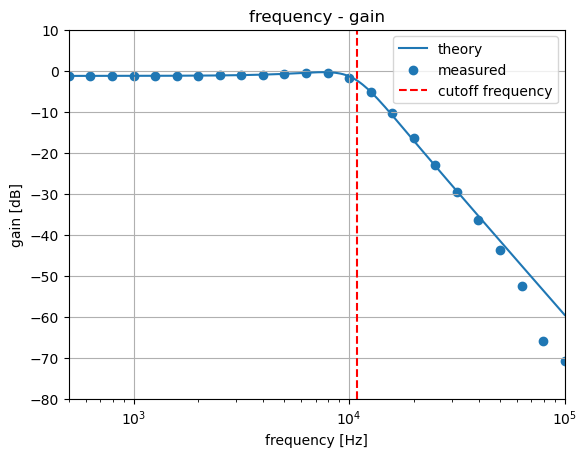

In [165]:
dat = pd.read_csv("4_bode_bw3lpf.csv")
dat["gain_dB"] = 20*np.log10(dat["gain"])
interp_func = interp1d(dat["gain_dB"], dat["freq"], bounds_error=False, fill_value="extrapolate")

freq_3dB = interp_func(-3)
print(f"3dB cutoff frequency: {freq_3dB/1000:.2f} kHz")
T = 1/(2*np.pi*freq_3dB)
print(f"time constant: {T*1e3:.3f} ms")
dat_above_cutoff = dat[dat["freq"] > freq_3dB]
dat_cutoff = dat_above_cutoff[dat_above_cutoff["freq"] < 4e4]

log_freq = np.log10(dat_cutoff["freq"])

slope, intercept, r_value, p_value, std_err = linregress(log_freq, dat_cutoff["gain_dB"])
print(f"slope: {slope:.3f}, intercept: {intercept:.3f}, r^2: {r_value**2:.3f}")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain [dB]", grid="both", xlim=(5e2,1e5),ylim=(-80,10),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_theory, label="theory")
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], 20*np.log10(dat["gain"]), label="measured")
ax.axvline(x=freq_3dB, color="red", linestyle="--", label="cutoff frequency")
axstg.apply_axes(ax)

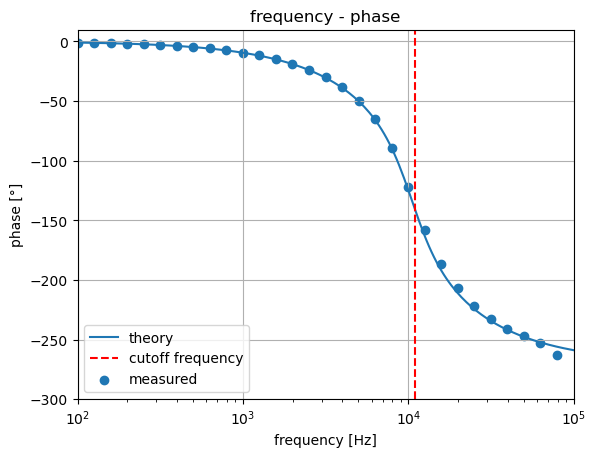

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase [°]", grid="both", xlim=(1e2,1e5),ylim=(-300,10),xscale="log", title="frequency - phase")
axstg.plot_func(ax, phase_theory_fix, label="theory")
# axstg.plot_func(ax, gain_dB)
ax.axvline(x=freq_3dB, color="red", linestyle="--", label="cutoff frequency")

ax.scatter(dat["freq"], dat["phase"], label="measured")
axstg.apply_axes(ax)

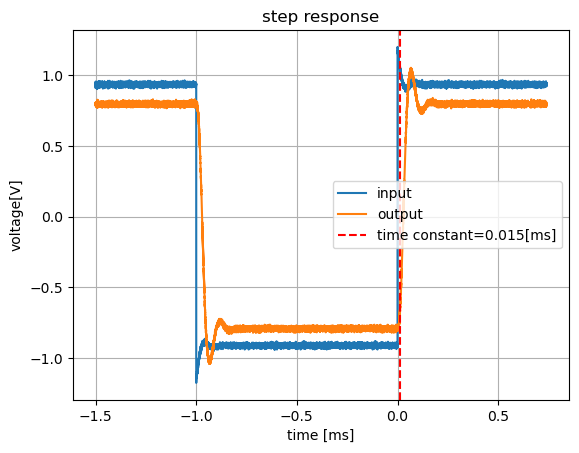

In [167]:
dat = pd.read_csv("4_osc_bwlpf_zoom.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True,xlabel="time [ms]", ylabel="voltage[V]", grid="both",title="step response")
ax.plot(dat["time"]*1000, dat["CH1"], label="input")
ax.plot(dat["time"]*1000, dat["CH2"], label="output")
ax.axvline(x=T*1000, color="red", linestyle="--", label="time constant=0.015[ms]")
# ax.plot(dat["time"], dat["CH3"], label="output")

axstg.apply_axes(ax)

## butterworth HPF

In [168]:
#L: 63.50Ω
def H(f):
    s = 1j*2*np.pi*f
    r=63.50
    R = 862.32
    C1 = 9.179e-9
    C2 = 36.32e-9
    L = 10.203e-3
    ret = (R/(1+(R+1/(s*C2))/(s*L+r)))/(1/(1/(R+1/(s*C2))+1/(s*L+r))+1/(s*C1))
    return ret
gain_theory = lambda f: 20*np.log10(np.abs(H(f)))
phase_theory = lambda f: np.angle(H(f), deg=True)
phase_theory_fix = lambda f: phase_theory(f) + 360*(phase_theory(f)<0)

3dB cutoff frequency: 15.67 kHz
time constant: 0.010 ms
slope: 52.141, intercept: -216.774, r^2: 0.998


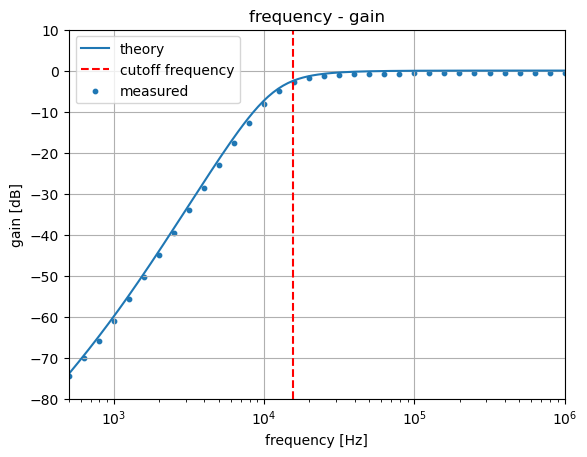

In [169]:
dat = pd.read_csv("4_bode_bw3hpf.csv")
dat["gain_dB"] = 20*np.log10(dat["gain"])
interp_func = interp1d(dat["gain_dB"], dat["freq"], bounds_error=False, fill_value="extrapolate")

freq_3dB = interp_func(-3)
print(f"3dB cutoff frequency: {freq_3dB/1000:.2f} kHz")
T = 1/(2*np.pi*freq_3dB)
print(f"time constant: {T*1e3:.3f} ms")
dat_above_cutoff = dat[dat["freq"] < freq_3dB]
dat_cutoff = dat_above_cutoff[dat_above_cutoff["freq"] > 1000]

log_freq = np.log10(dat_cutoff["freq"])

slope, intercept, r_value, p_value, std_err = linregress(log_freq, dat_cutoff["gain_dB"])
print(f"slope: {slope:.3f}, intercept: {intercept:.3f}, r^2: {r_value**2:.3f}")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain [dB]", grid="both", xlim=(5e2,1e6),ylim=(-80,10),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_theory,label="theory")
# axstg.plot_func(ax, gain_dB)
ax.axvline(x=freq_3dB, color="red", linestyle="--", label="cutoff frequency")
ax.scatter(dat["freq"], 20*np.log10(dat["gain"]), label="measured",s=10)
axstg.apply_axes(ax)

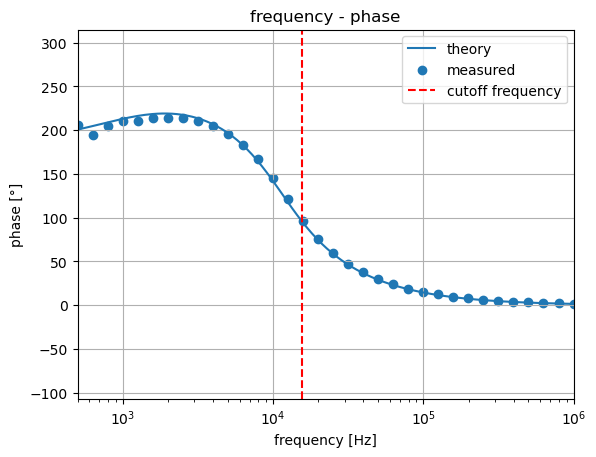

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase [°]", grid="both", xlim=(5e2,1e6),xscale="log", title="frequency - phase")
axstg.plot_func(ax, phase_theory_fix, label="theory")
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], dat["phase"], label="measured")
ax.axvline(x=freq_3dB, color="red", linestyle="--", label="cutoff frequency")
axstg.apply_axes(ax)

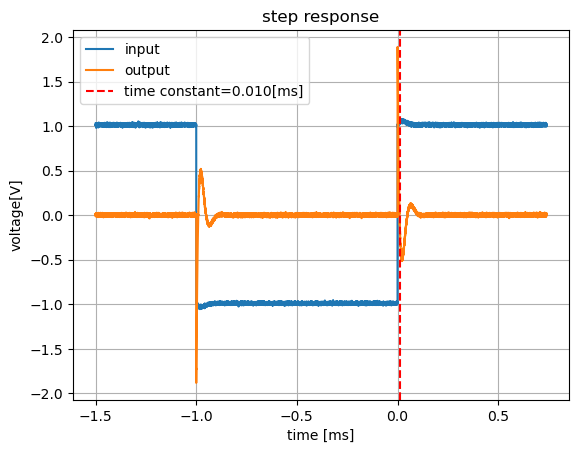

In [171]:
dat = pd.read_csv("4_osc_bwhpf_zoom.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True,xlabel="time [ms]", ylabel="voltage[V]", grid="both",title="step response")
ax.plot(dat["time"]*1000, dat["CH1"], label="input")
ax.plot(dat["time"]*1000, dat["CH2"], label="output")
# ax.plot(dat["time"], dat["CH3"], label="output")
ax.axvline(x=T*1000, color="red", linestyle="--", label="time constant=0.010[ms]")

axstg.apply_axes(ax)

## Chebichev LPF

In [172]:
# L1: 5.13Ω  L2: 23.64+5m+5.13Ω
def H(f):
    R1=5.13; R2=23.64+5e-3+5.13
    s = 1j*2*np.pi*f
    R = 906.85
    C = 4.414e-9
    L1 = 4.676e-3;  L2 = 2.8361e-3
    ret = (R/(1+s*C*(s*L2+R2+R)))/((1/(1/(s*L2+R+R2)+s*C))+s*L1+R1)
    return ret
gain_theory = lambda f: 20*np.log10(np.abs(H(f))) 
phase_theory = lambda f: np.angle(H(f), deg=True)
phase_theory_fix = lambda f: phase_theory(f) - 360*(phase_theory(f)>0)

3dB cutoff frequency: 53.51 kHz
time constant: 0.003 ms
slope: -67.771, intercept: 318.463, r^2: 0.999


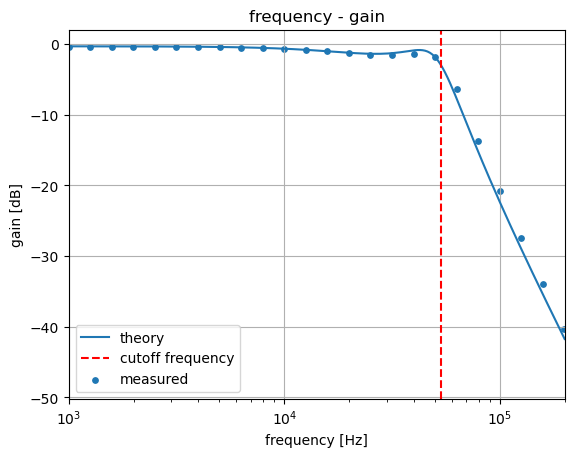

In [173]:
dat = pd.read_csv("4_bode_cheblpf_re.csv")
dat["gain_dB"] = 20*np.log10(dat["gain"])
interp_func = interp1d(dat["gain_dB"], dat["freq"], bounds_error=False, fill_value="extrapolate")

freq_3dB = interp_func(-3)
print(f"3dB cutoff frequency: {freq_3dB/1000:.2f} kHz")
T = 1/(2*np.pi*freq_3dB)
print(f"time constant: {T*1e3:.3f} ms")
dat_above_cutoff = dat[dat["freq"] > freq_3dB]
dat_cutoff = dat_above_cutoff[dat_above_cutoff["freq"] < 2e5]

log_freq = np.log10(dat_cutoff["freq"])

slope, intercept, r_value, p_value, std_err = linregress(log_freq, dat_cutoff["gain_dB"])
print(f"slope: {slope:.3f}, intercept: {intercept:.3f}, r^2: {r_value**2:.3f}")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain [dB]", grid="both", xlim=(1e3,2e5),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_theory, label="theory")
ax.axvline(x=freq_3dB, color="red", linestyle="--", label="cutoff frequency")
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], 20*np.log10(dat["gain"]), label="measured", s=15)
axstg.apply_axes(ax)

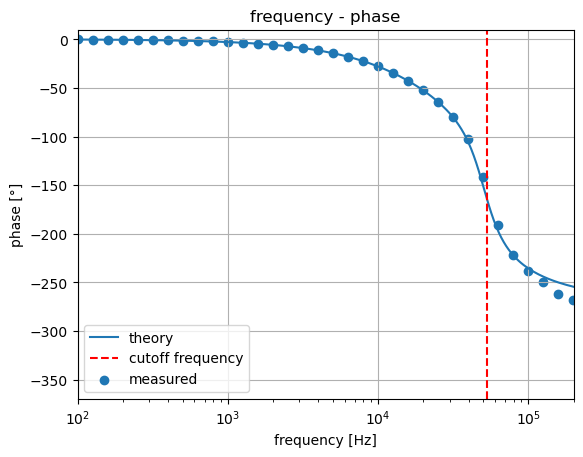

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase [°]", grid="both", xlim=(1e2,2e5),ylim=(-370,10),xscale="log", title="frequency - phase")
axstg.plot_func(ax, phase_theory_fix, label="theory")
# axstg.plot_func(ax, gain_dB)
ax.axvline(x=freq_3dB, color="red", linestyle="--", label="cutoff frequency")
ax.scatter(dat["freq"], dat["phase"], label="measured")
axstg.apply_axes(ax)

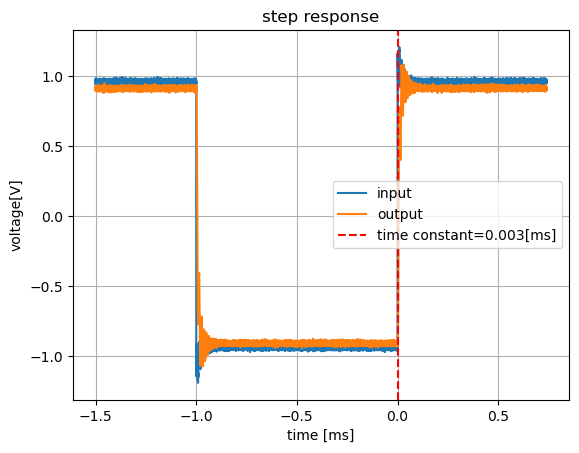

In [175]:
dat = pd.read_csv("4_osc_cheblpf_zoom.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True,xlabel="time [ms]", ylabel="voltage[V]", grid="both",title="step response")
ax.plot(dat["time"]*1000, dat["CH1"], label="input")
ax.plot(dat["time"]*1000, dat["CH2"], label="output")
# ax.plot(dat["time"], dat["CH3"], label="output")
ax.axvline(x=T*1000, color="red", linestyle="--", label="time constant=0.003[ms]")

axstg.apply_axes(ax)

## Chebichev HPF

In [176]:
# L: 58.80Ω
def H(f):
    s = 1j*2*np.pi*f
    R1=58.80
    R = 606.6
    C1 = 21.01e-9
    C2 = 31.53e-9
    L = 9.984e-3
    ret = (R/(1+(R+1/(s*C2))/(s*L+R1)))/(1/(1/(R+1/(s*C2))+1/(s*L+R1))+1/(s*C1))
    return ret
gain_theory = lambda f: 20*np.log10(np.abs(H(f)))
phase_theory = lambda f: np.angle(H(f), deg=True)
phase_theory_fix = lambda f: phase_theory(f) + 360*(phase_theory(f)<0)

3dB cutoff frequency: 9.49 kHz
Time constant: 0.017 ms
slope: 61.921, intercept: -245.928, r^2: 0.999


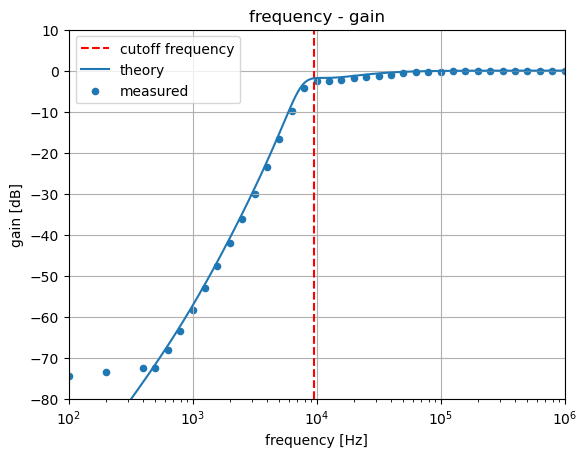

In [177]:
dat = pd.read_csv("4_bode_chebhpf.csv")
dat["gain_dB"] = 20*np.log10(dat["gain"])
interp_func = interp1d(dat["gain_dB"], dat["freq"], bounds_error=False, fill_value="extrapolate")

freq_3dB = interp_func(-3)
print(f"3dB cutoff frequency: {freq_3dB/1000:.2f} kHz")
T=1/(2*np.pi*freq_3dB)
print(f"Time constant: {T*1000:.3f} ms")
dat_above_cutoff = dat[dat["freq"] < freq_3dB]
dat_cutoff = dat_above_cutoff[dat_above_cutoff["freq"] > 1000]

log_freq = np.log10(dat_cutoff["freq"])

slope, intercept, r_value, p_value, std_err = linregress(log_freq, dat_cutoff["gain_dB"])
print(f"slope: {slope:.3f}, intercept: {intercept:.3f}, r^2: {r_value**2:.3f}")

fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain [dB]", grid="both", xlim=(1e2,1e6),ylim=(-80,10),xscale="log", title="frequency - gain")
ax.axvline(x=freq_3dB, color="red", linestyle="--", label="cutoff frequency")
axstg.plot_func(ax, gain_theory, label="theory")
# axstg.plot_func(ax, gain_dB)
ax.scatter(dat["freq"], 20*np.log10(dat["gain"]), label="measured",s=20)
axstg.apply_axes(ax)

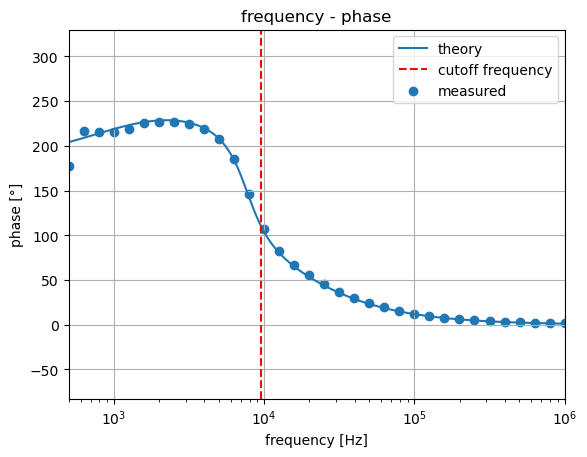

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase [°]", grid="both", xlim=(5e2,1e6),xscale="log", title="frequency - phase")
axstg.plot_func(ax, phase_theory_fix, label="theory")
# axstg.plot_func(ax, gain_dB)
ax.axvline(x=freq_3dB, color="red", linestyle="--", label="cutoff frequency")
ax.scatter(dat["freq"], dat["phase"], label="measured")
axstg.apply_axes(ax)

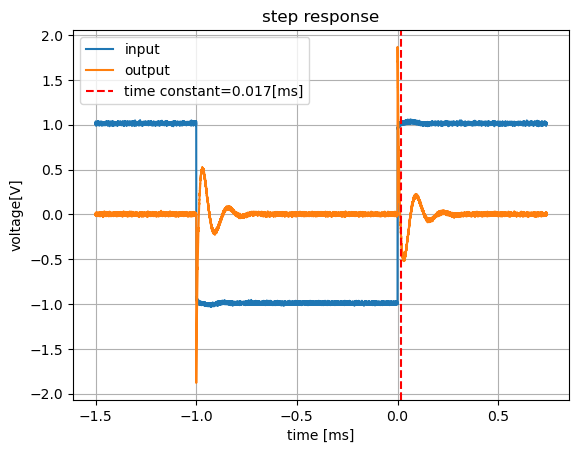

In [179]:
dat = pd.read_csv("4_osc_chebhpf_zoom.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True,xlabel="time [ms]", ylabel="voltage[V]", grid="both",title="step response")
ax.plot(dat["time"]*1000, dat["CH1"], label="input")
ax.plot(dat["time"]*1000, dat["CH2"], label="output")
# ax.plot(dat["time"], dat["CH3"], label="output")
ax.axvline(x=T*1000, color="red", linestyle="--", label="time constant=0.017[ms]")
axstg.apply_axes(ax)